In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from PIL import Image
from glob import glob

In [2]:
data=np.load('./Data/data_10000_norm.npz')

In [3]:
data.files

['arr_0', 'arr_1']

In [4]:
X=data['arr_0'] #independent features
y=data['arr_1'] #target values

In [5]:
X.shape,y.shape

((5461, 10000), (5461,))

# Eigen Image

In [6]:
X1=X-X.mean(axis=0)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca=PCA(n_components=None,whiten=True,svd_solver='auto')

In [9]:
x_pca=pca.fit_transform(X1)

In [10]:
x_pca.shape

(5461, 5461)

In [11]:
eigen_ratio=pca.explained_variance_ratio_
eigen_ratio_cum=np.cumsum(eigen_ratio)

<function matplotlib.pyplot.show(close=None, block=None)>

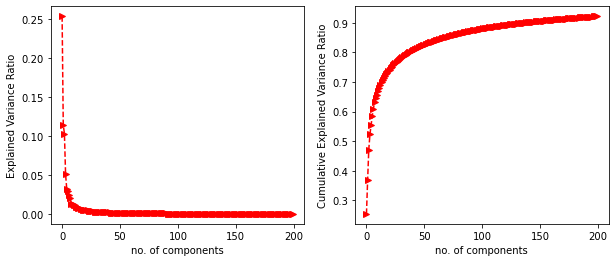

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explained Variance Ratio')
plt.subplot(1,2,2)
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.show
#elbow method

#### conclusion: Using elbow method,consider no.of components between 25-30

#### since if I consider no between 25 to 30,the explained variance is 75%,so in order to get min 80% variance,I am considering 50 components

In [13]:
pca_50=PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50=pca_50.fit_transform(X1)
#reducing dimensions using pca

In [14]:
x_pca_50.shape

(5461, 50)

In [15]:
#saving pca
import pickle

In [16]:
pickle.dump(pca_50,open('./Model/pca_50.pickel','wb'))

In [17]:
#consider 50 components and inverse transform
x_pca_inv = np.dot(x_pca_50, pca_50.components_) + pca_50.mean_

In [18]:
x_pca_inv.shape

(5461, 10000)

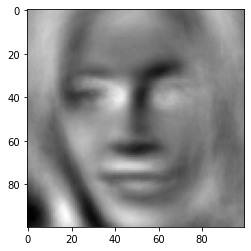

In [19]:
#consider one image(one row)
eig_img=x_pca_inv[0,:]
eig_img=eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

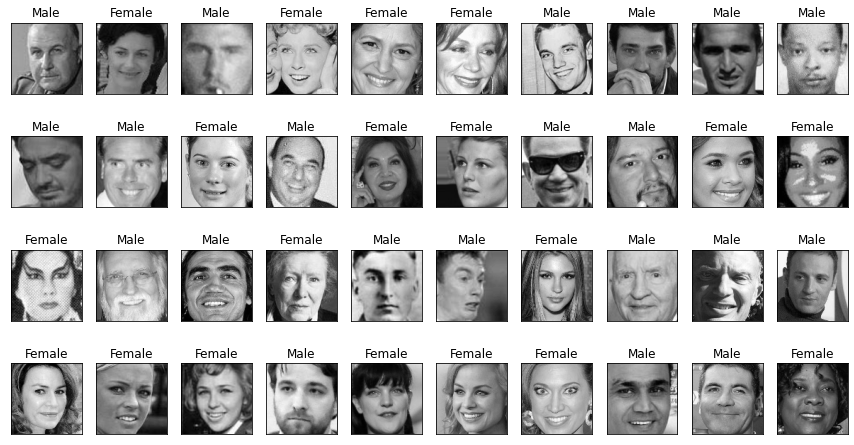

====================Eigen Images====================


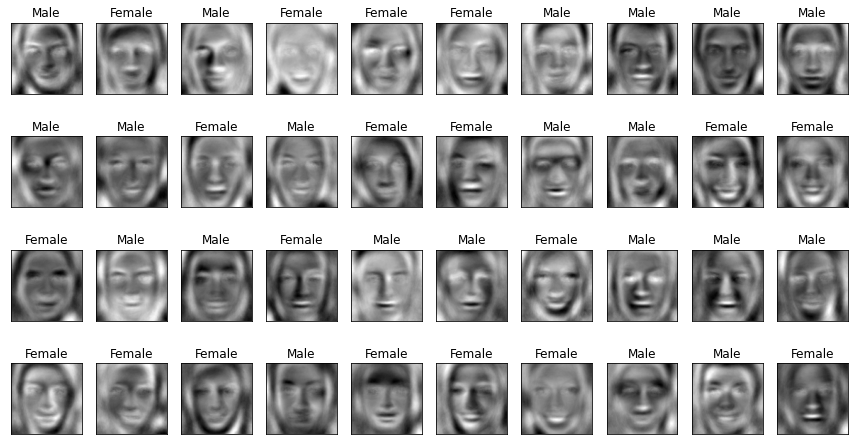

In [20]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics=np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()


In [22]:
#saving
np.savez("./Data/data_pca_50_y_mean.pickle",x_pca_50,y,X.mean(axis=0))